## On va débuter step by step 

### Inscription et récupération des données :

- Aller sur le site [Kaggle](https://www.kaggle.com) et inscrivez-vous
- Ensuite aller sur le contest du [Titanic](https://www.kaggle.com/c/titanic)
- Télécharger les données ```train.csv``` et ```test.csv``` dans [l'onglet data](https://www.kaggle.com/c/titanic/data)
- Mettez ces données dans un répertoire nommé ```input```

----------------------

Lancer votre notebook grâce à la commande dans votre terminal
```
jupyter notebook
```

In [2]:
# Importer les lib python
import pandas as pd

Petit rappel pour lire un fichier en local, utiliser la fonction ```read_csv```

Si vous avez des difficultés à utiliser une fonction, vous pouvez taper le nom de la fonction + "?" :
```
pd.read_csv?
```

*Pour fermer la fenêtre d'aide, cliquez sur la croix en haut à gauche de la fenêtre d'aide*

In [295]:
# Lire un fichier Train
train = pd.read_csv('input/train.csv')

Pour regarder un fichier, vous pouvez taper : 
    - le nom du DataFrame --> Afficher l'ensemble du DataFrame
    - Utiliser ".head()" --> Affiche les 5 premières lignes
    - Utiliser ".tail()" --> Affiche les 5 dernières lignes

In [296]:
# Regarder le début d'un DataFrame
train.head(17)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Signification des colonnes :
    - Survived : indique la mort ou la survie du passager pour les données d'apprentissage. C'est ce que l'on doit prédire sur fichier test. Cette valeur est booléene (0 ou 1) : 1 pour survie, 0 pour la mort
    - Pclass : La classe des chambres du navire (3 niveaux), 1 étant la meilleure classe et 3 la classe "éco". C'est une variable texte qui va falloir transformer en faisant attention car il y a une notion d'ordre.
    - Name : Nom de la personne
    - Sex : Sexe du passager
    - Age : âge du passager
    - SisbSp : (Sibling and Spouse) : le nombre de membres de la famille du passager de type frère, soeur, demi-frère, demi-soeur, époux, épouse...
    - Parch : (Parent and Child) : le nombre de membres de la famille du passager du type père, mère, fils, fille, beau-fils, etc...
    - Ticket : Numéro du ticket
    - Fare : le prix du ticket
    - Cabin : numéro de cabine
    - Embarked : le port d'embarquement du passager : C -> Cherbourg; Q -> Queenstown; S -> Southampton

In [297]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

**count()** permet de voir qu'il y a des données qui sont manquantes / absentes

## Faire un premier modèle simple :

On va crée un function python afin de faciler le reproduction par la suite

**Target** est donc notre cible (ce que l'on essaye de prédire')

In [338]:
def parse_model(X):
    """
    Parse mes données pour nourrir un algo.
    - Return :
        - X : features pour prédire le résutat
        - target : si la personne à survécu ou est morte
    """
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch']]
    return X, target

In [339]:
X, y = parse_model(train.copy())

**X** sont nos données afin de déviner si le passager est mort ou non

In [340]:
X.head()

,Fare,SibSp,Parch
0,7.2500,1,0
1,71.2833,1,0
2,7.9250,0,0
3,53.1000,1,0
4,8.0500,0,0


**y** est la valeur booléen de survit ou non du Titanic

In [301]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [302]:
# Permet de valider notre modèle
from sklearn.cross_validation import cross_val_score, train_test_split

# Modèle linéaire
from sklearn.linear_model import LogisticRegression

In [303]:
# Etape 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [304]:
print"X_train : " + str(X_train.shape)
print"X_test : " + str(X_test.shape)
print"y_train : " + str(y_train.shape)
print"y_test : " + str(y_test.shape)

X_train : (668, 3)
X_test : (223, 3)
y_train : (668,)
y_test : (223,)


In [305]:
ma_regression = LogisticRegression() # On initialise notre algo

ma_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [306]:
ma_regression?

In [307]:
ma_prediction = ma_regression.predict(X_test)
# ma_prediction est un array (= list)
ma_prediction[0:5] # On affiche les 5 premiers résultats

array([0, 0, 0, 0, 0])

In [308]:
# Mon score de précision sur mes données d'apprentissage
ma_regression.score(X_train, y_train)

0.68113772455089816

In [309]:
# Etape 2
# Function de score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, ma_prediction)

0.67713004484304928

On peux voir en changeant le chiffre du paramêtre **random_state** de  **train_test_split** (étape 1) que le résultat du score sur les données d'apprentissage et sur les données test change

D'ailleurs l'étape 2 est égal : 

In [310]:
accuracy_score(y_train, ma_regression.predict(X_train))

0.68113772455089816

### Utilisation de la cross_validation (CV) :

La méthode de validation **Cross Validation** permet de prendre en entrée **X** (nos features) et **y** (survie ou mort) et d'entrainer un algo sur 4/5 du jeu de données et de tester (le score) sur 1/5.

In [311]:
from sklearn.cross_validation import cross_val_score
def cross_validation_score(algo, X, y):
    """
    Utilise une cross validation sur un algo et return tout ses scores
    """
    score_cv = cross_val_score(algo, X, y, cv=5)
    return score_cv

In [312]:
mon_score = cross_validation_score(ma_regression, X, y)

In [313]:
print "Voila le résultat de la CV " + str(mon_score)

Voila le résultat de la CV [ 0.59776536  0.74301676  0.66853933  0.6741573   0.68926554]


In [314]:
print "Voila la moyenne de la CV " + str(mon_score.mean())

Voila la moyenne de la CV 0.674548857768


### Submission :

Charger le fichier test :

In [315]:
test = pd.read_csv("input/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [316]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [341]:
# Etape 3
# On fit notre algo
ma_regression.fit(X, y)
use_features = ['Fare', 'SibSp', 'Parch']
prediction = ma_regression.predict(test[use_features])
# Error

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**Il semble que nos données de test soient NaN (absentes)**

In [318]:
pd.isnull(test[use_features]).sum()

Fare     1
SibSp    0
Parch    0
dtype: int64

In [134]:
test[pd.isnull(test.Fare)][use_features]

,Fare,SibSp,Parch
152,NaN,0,0


On va donc remplacer cette valeur manquante : 
    - Soit on choisit une valeur subjective
    - On prend la valeur la plus adéquate sur notre jeux de données **train** (comme la médiane)

In [138]:
# Lib de calcul
import numpy as np

mediane_fare = np.median(train['Fare'])
print "La medianne de Fare dans notre jeu de données train est : " + str(mediane_fare)

La medianne de Fare dans notre jeu de données train est : 14.4542


Il faut donc remplacer la / les valeurs manquantes de **Fare** dans notre jeu de données **test** par la médiane calculé

In [142]:
test['Fare'] = test['Fare'].fillna(mediane_fare)
test[pd.isnull(test.Fare)][use_features] # Plus de Fare NaN

,Fare,SibSp,Parch


On reprendre notre étape 3 :

In [143]:
# Etape 3 bis
# On fit notre algo
ma_regression.fit(X, y)
use_features = ['Fare', 'SibSp', 'Parch']
test['Fare'] = test['Fare'].fillna(mediane_fare)   
prediction = ma_regression.predict(test[use_features])

In [144]:
print prediction

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0]


In [270]:
test.shape

(418, 11)

In [271]:
len(prediction)

418

In [145]:
# On ajoute notre prédiction sur notre jeux de données test
test['Survived'] = prediction
fichier_prediction = test[['PassengerId', 'Survived']]
fichier_prediction.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [272]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [277]:
fichier_prediction.Survived.value_counts(normalize=True)

0    0.703349
1    0.296651
Name: Survived, dtype: float64

**Créer un dossier "output" au même niveau que le dossier "input"**

In [149]:
# Ecrire un fichier à partir d'un DataFrame
fichier_prediction.to_csv('output/premier_test.csv', index=False)

Aller sur [Kaggle](https://www.kaggle.com/c/titanic/submissions/attach) et faite une submission afin de voir votre score :)

In [150]:
# 0.6555 est assez proche de notre CV

### Battre notre 1er modèle :

Comment faire mieux que notre premier modèle. Il faut garder en mémoire que l'on à utiliser seulement 3 features...

#### Etude de la features Pclass (classe des chambres)

In [157]:
# Pour afficher des images (pas besoin de taper cet import)
from IPython.display import Image
Image(url="http://i.giphy.com/9ABgKHIu3acWA.gif")

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
# Pour que les graphique s'affichent dans le notebook
%matplotlib inline 


In [285]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


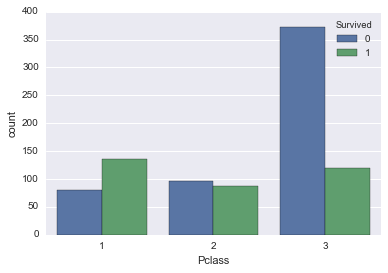

In [286]:
sns.countplot(train.Pclass, hue=train.Survived)

In [287]:
pd.get_dummies(train.Pclass, prefix="split_Pclass").head()

,split_Pclass_1,split_Pclass_2,split_Pclass_3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [319]:
v

In [320]:
X, y = parse_model_1(train)

In [321]:
X.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3
0,7.2500,1,0,0.0,0.0,1.0
1,71.2833,1,0,1.0,0.0,0.0
2,7.9250,0,0,0.0,0.0,1.0
3,53.1000,1,0,1.0,0.0,0.0
4,8.0500,0,0,0.0,0.0,1.0


In [322]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [323]:
mon_score_2 = cross_validation_score(ma_regression, X, y)

In [324]:
mon_score_2

array([ 0.60335196,  0.69832402,  0.67977528,  0.71348315,  0.76836158])

In [325]:
print "Voila la moyenne de la CV " + str(mon_score_2.mean())

Voila la moyenne de la CV 0.692659197308


In [326]:
mon_score_2.mean()

0.6926591973081655

In [327]:
# 1er score = 0.674

In [329]:
# On recherche notre jeu de données test
mon_test = pd.read_csv("input/test.csv")

In [330]:
# Etape 3 bis
ma_regression.fit(X, y)
#use_features = [['Fare', 'SibSp', 'Parch', 'Pclass']]
mon_test = mon_test[['Fare', 'SibSp', 'Parch', 'Pclass']]
mes_dummy_test = pd.get_dummies(mon_test.Pclass, prefix="split_Pclass")
mon_test = mon_test.join(mes_dummy_test)
mon_test = mon_test.drop('Pclass', axis=1)
mon_test['Fare'] = mon_test['Fare'].fillna(mediane_fare)

In [218]:
mon_test.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3
0,7.8292,0,0,0.0,0.0,1.0
1,7.0000,1,0,0.0,0.0,1.0
2,9.6875,0,0,0.0,1.0,0.0
3,8.6625,0,0,0.0,0.0,1.0
4,12.2875,1,1,0.0,0.0,1.0


In [332]:
ma_regression.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [333]:
prediction = ma_regression.predict(mon_test)

In [334]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0,

In [335]:
# On ajoute notre prédiction sur notre jeux de données test
test['Survived'] = prediction
fichier_prediction = test[['PassengerId', 'Survived']]
fichier_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [336]:
# Ecrire un fichier à partir d'un DataFrame
fichier_prediction.to_csv('output/dexieme_test.csv', index=False)

### Interpréter notre algo

In [343]:
ma_regression.coef_[0]

array([ 0.01624874, -0.2456153 ,  0.15536342])

In [344]:
mon_resultat = pd.DataFrame({'coef' : ma_regression.coef_[0], 
                            'features' : X.columns})
#mon_resultat['coef'] = ma_regression.coef_[0]
#mon_resultat['features'] = ['Fare', 'SibSp', 'Parch', 'Pclass']

In [345]:
mon_resultat

,coef,features
0,0.016249,Fare
1,-0.245615,SibSp
2,0.155363,Parch


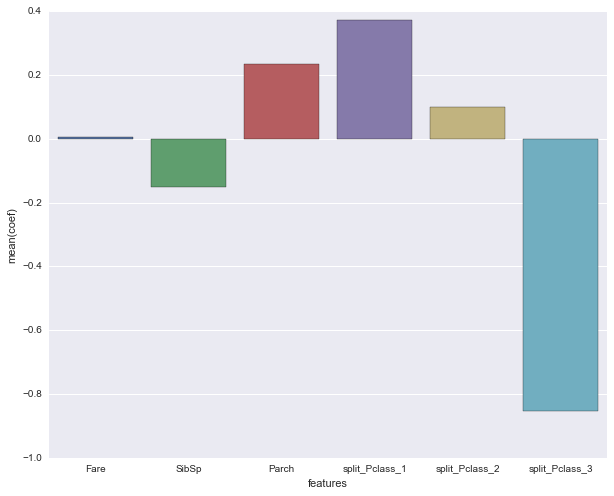

In [235]:
plt.figure(figsize=(10,8))
sns.barplot(x='features', y='coef', data=mon_resultat)

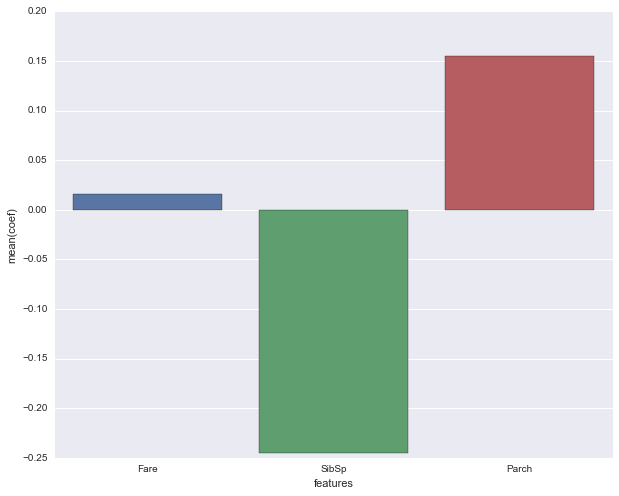

In [347]:
# 1 er modèle
plt.figure(figsize=(10,8))
sns.barplot(x='features', y='coef', data=mon_resultat)

Un poid positif augmente la probalité de survie.
Un poid négatif diminue la probabilité de survie.

In [349]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Ajout du sexe :

In [350]:
def parse_model_2(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex']]   # Ajout d'une features
    # Pclass
    mes_dummy_Pclass = pd.get_dummies(X.Pclass, prefix="split_Pclass")
    X = X.join(mes_dummy_Pclass)
    X = X.drop('Pclass', axis=1)
    # Sex
    mes_dummy_Sex = pd.get_dummies(X.Sex, prefix="split_Sex")
    X = X.join(mes_dummy_Sex)
    X = X.drop('Sex', axis=1)
    return X, target

In [351]:
X, y = parse_model_2(train.copy())

In [352]:
X.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male
0,7.2500,1,0,0.0,0.0,1.0,0.0,1.0
1,71.2833,1,0,1.0,0.0,0.0,1.0,0.0
2,7.9250,0,0,0.0,0.0,1.0,1.0,0.0
3,53.1000,1,0,1.0,0.0,0.0,1.0,0.0
4,8.0500,0,0,0.0,0.0,1.0,0.0,1.0


In [353]:
mon_score_3 = cross_validation_score(ma_regression, X, y)

In [354]:
mon_score_3

array([ 0.80446927,  0.80446927,  0.78089888,  0.76966292,  0.81355932])

In [355]:
mon_score_3.mean()

0.79461193345454817

In [356]:
ma_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [358]:
# On recherche notre jeu de données test
mon_test = pd.read_csv("input/test.csv")

#use_features = [['Fare', 'SibSp', 'Parch', 'Pclass']]
mon_test = mon_test[['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex']]
# Pclass
mes_dummy_Pclass_test = pd.get_dummies(mon_test.Pclass, prefix="split_Pclass")
mon_test = mon_test.join(mes_dummy_Pclass_test)
mon_test = mon_test.drop('Pclass', axis=1)
# Sex
mes_dummy_Sex_test = pd.get_dummies(mon_test.Sex, prefix="split_Sex")
mon_test = mon_test.join(mes_dummy_Sex_test)
mon_test = mon_test.drop('Sex', axis=1)
# Autres 
mon_test['Fare'] = mon_test['Fare'].fillna(mediane_fare)

In [359]:
mon_test.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male
0,7.8292,0,0,0.0,0.0,1.0,0.0,1.0
1,7.0000,1,0,0.0,0.0,1.0,1.0,0.0
2,9.6875,0,0,0.0,1.0,0.0,0.0,1.0
3,8.6625,0,0,0.0,0.0,1.0,0.0,1.0
4,12.2875,1,1,0.0,0.0,1.0,1.0,0.0


In [361]:
prediction = ma_regression.predict(mon_test)

In [362]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [363]:
# On ajoute notre prédiction sur notre jeux de données test
test['Survived'] = prediction
fichier_prediction = test[['PassengerId', 'Survived']]
fichier_prediction.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [364]:
# Ecrire un fichier à partir d'un DataFrame
fichier_prediction.to_csv('output/test_3.csv', index=False)

### Ajout d'une features "Enfant" :

In [371]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [379]:
def parse_model_3(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex', 'Age']]   # Ajout d'une features
    # Pclass
    mes_dummy_Pclass = pd.get_dummies(X.Pclass, prefix="split_Pclass")
    X = X.join(mes_dummy_Pclass)
    X = X.drop('Pclass', axis=1)
    # Sex
    mes_dummy_Sex = pd.get_dummies(X.Sex, prefix="split_Sex")
    X = X.join(mes_dummy_Sex)
    X = X.drop('Sex', axis=1)
    # Enfant oui ou non ?
    X['enfant'] = 0
    X.loc[X.Age <= 10, 'enfant'] = 1
    X = X.drop('Age', axis=1)
    return X, target

In [380]:
X, y = parse_model_3(train.copy())

In [377]:
X.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male,enfant
0,7.2500,1,0,0.0,0.0,1.0,0.0,1.0,1
1,71.2833,1,0,1.0,0.0,0.0,1.0,0.0,1
2,7.9250,0,0,0.0,0.0,1.0,1.0,0.0,1
3,53.1000,1,0,1.0,0.0,0.0,1.0,0.0,1
4,8.0500,0,0,0.0,0.0,1.0,0.0,1.0,1


In [378]:
X.enfant.value_counts(normalize=True)

1    0.731762
0    0.268238
Name: enfant, dtype: float64

In [381]:
mon_score_4 = cross_validation_score(ma_regression, X, y)

In [382]:
mon_score_4

array([ 0.80446927,  0.81005587,  0.78651685,  0.7752809 ,  0.81355932])

In [383]:
mon_score_4.mean()

0.79797644290153835

In [384]:
# On recherche notre jeu de données test
mon_test = pd.read_csv("input/test.csv")

#use_features = [['Fare', 'SibSp', 'Parch', 'Pclass']]
mon_test = mon_test[['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex','Age']]
# Pclass
mes_dummy_Pclass_test = pd.get_dummies(mon_test.Pclass, prefix="split_Pclass")
mon_test = mon_test.join(mes_dummy_Pclass_test)
mon_test = mon_test.drop('Pclass', axis=1)
# Sex
mes_dummy_Sex_test = pd.get_dummies(mon_test.Sex, prefix="split_Sex")
mon_test = mon_test.join(mes_dummy_Sex_test)
mon_test = mon_test.drop('Sex', axis=1)
# Enfant oui ou non ?
mon_test['enfant'] = 0
mon_test.loc[mon_test.Age <= 10, 'enfant'] = 1
mon_test = mon_test.drop('Age', axis=1)
# Autres 
mon_test['Fare'] = mon_test['Fare'].fillna(mediane_fare)

In [385]:
mon_test.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male,enfant
0,7.8292,0,0,0.0,0.0,1.0,0.0,1.0,0
1,7.0000,1,0,0.0,0.0,1.0,1.0,0.0,0
2,9.6875,0,0,0.0,1.0,0.0,0.0,1.0,0
3,8.6625,0,0,0.0,0.0,1.0,0.0,1.0,0
4,12.2875,1,1,0.0,0.0,1.0,1.0,0.0,0


In [388]:
ma_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [389]:
prediction = ma_regression.predict(mon_test)

In [390]:
prediction

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [391]:
# On ajoute notre prédiction sur notre jeux de données test
test['Survived'] = prediction
fichier_prediction = test[['PassengerId', 'Survived']]
fichier_prediction.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [393]:
# Ecrire un fichier à partir d'un DataFrame
fichier_prediction.to_csv('output/test_4.csv', index=False)

In [395]:
mon_resultat = pd.DataFrame({'coef' : ma_regression.coef_[0], 
                            'features' : X.columns})
#mon_resultat['coef'] = ma_regression.coef_[0]
#mon_resultat['features'] = ['Fare', 'SibSp', 'Parch', 'Pclass']

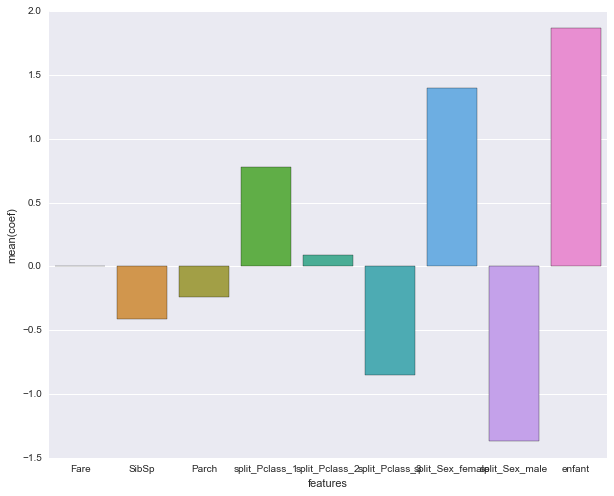

In [396]:
plt.figure(figsize=(10,8))
sns.barplot(x='features', y='coef', data=mon_resultat)

### Mes prédiction / probabilité de survie

In [445]:
moi = pd.DataFrame()
moi['Fare']=30,
moi['SibSp']=1,
moi['Parch']=2,
moi['split_Pclass_1']=1,
moi['split_Pclass_2']=0,
moi['split_Pclass_3']=0,
moi['split_Sex_female']=0,
moi['split_Sex_male']=1,
moi['enfant']=1



In [446]:
moi

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male,enfant
0,30,1,2,1,0,0,0,1,1


In [447]:
moi_prediction = ma_regression.predict(moi)

In [449]:
# 1 = survie / 0 = mort
print 'je suis ....' + str(moi_prediction)

je suis ....[1]


In [450]:
# Probabilité de survie
ma_regression.predict_proba(moi)[0][1]

0.63955770215074592